<a href="https://colab.research.google.com/github/Siva-Anand006/Excel_Project_Portfolio/blob/main/6220_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install **Pycaret**

In [4]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 39.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 16.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 45.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.

Import libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [6]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  2.0.3
Seaborn version:  0.13.1


In [8]:
#read cvs file into dataframe
df = pd.read_csv('/content/sample_data/diabetes.csv')
df.head(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [9]:
print("Dataset Shape", df.shape)

Dataset Shape (768, 9)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Exploratory Data Analysis

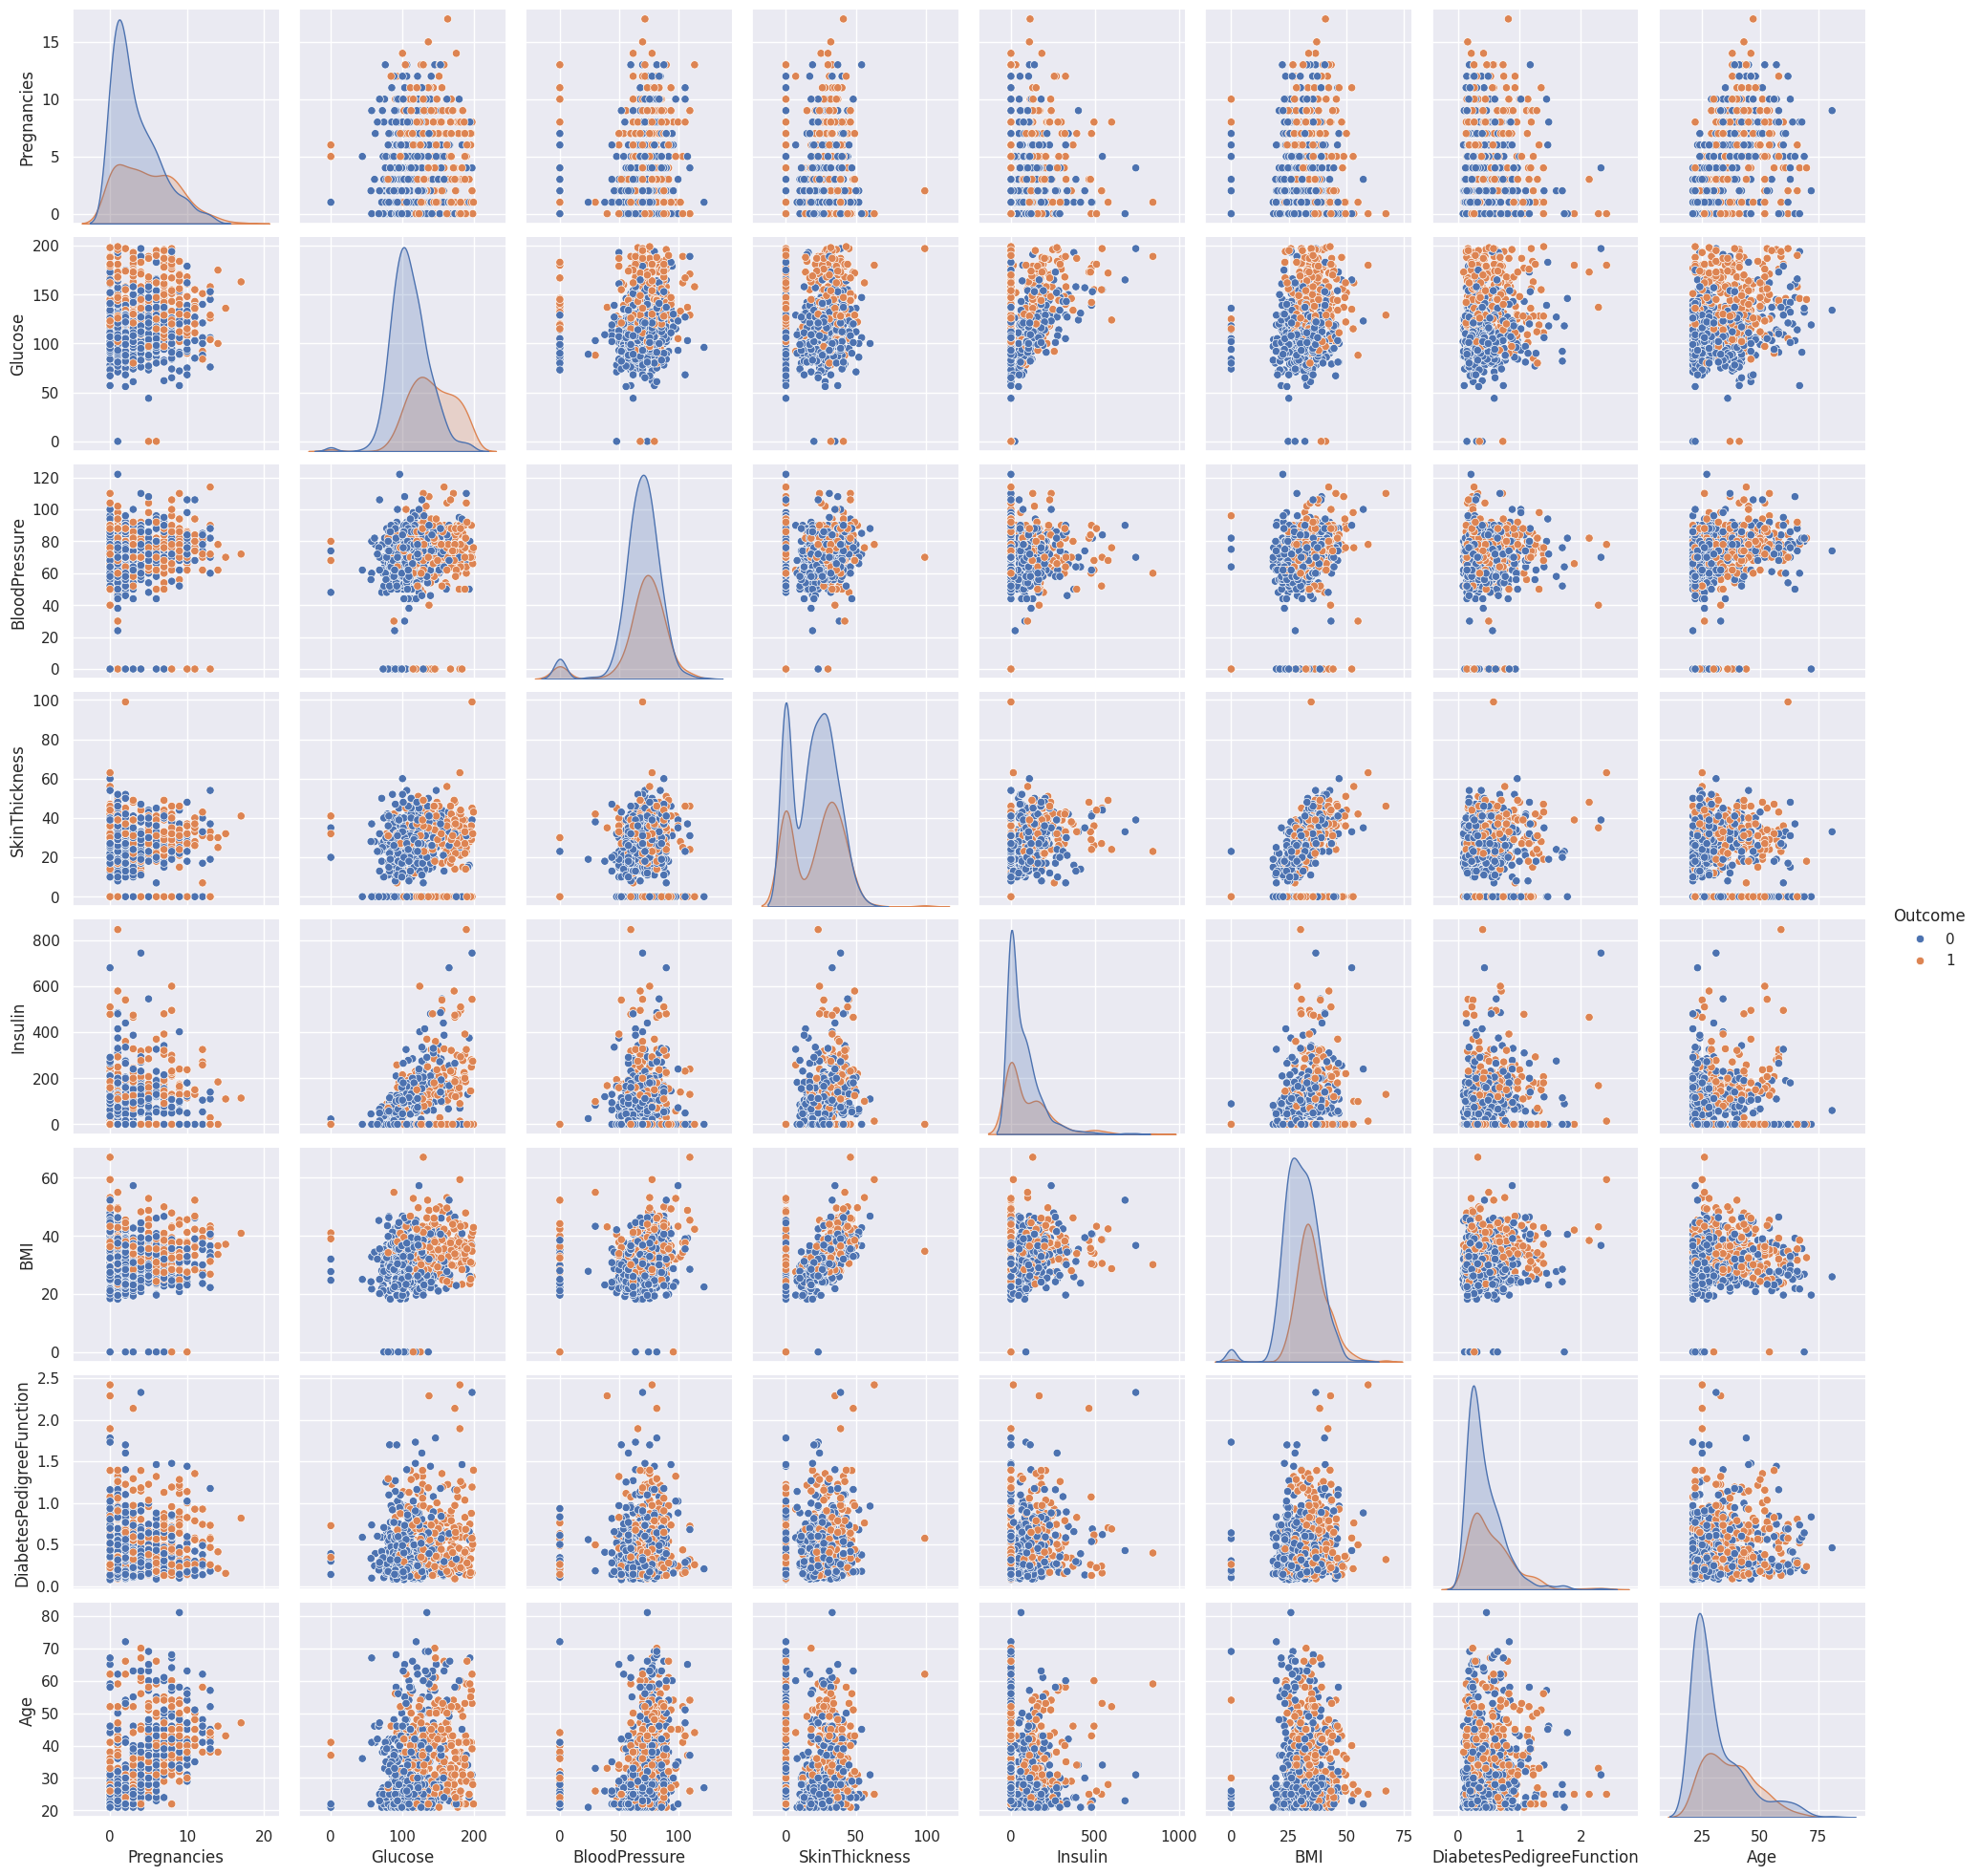

In [11]:
sns.pairplot(df, hue='Outcome')
plt.show()

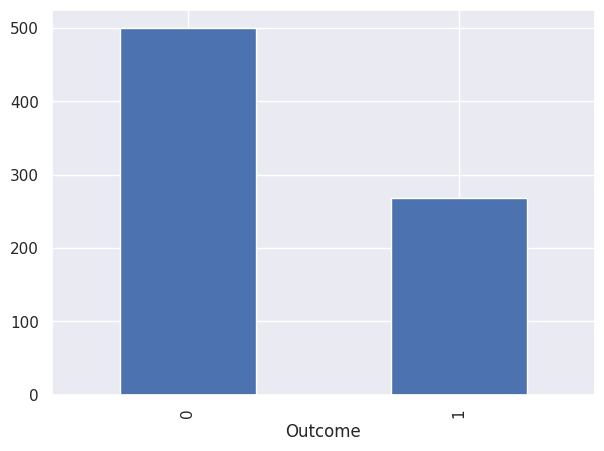

In [12]:
y =df['Outcome']
y.value_counts().plot(kind='bar')
plt.ylabel('')
plt.show()

Data Matrix

In [13]:
X = df.drop(columns=['Outcome'])
X.head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  
5                     0.201   30  
6                     0.248   26  
7                     0.134   29  
8                     0.158   53  
9                     0.232   54

In [14]:
X.describe().transpose()

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00

Standardize the Data

In [15]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1    -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2     1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3    -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4    -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   
5     0.342981 -0.153185       0.253036      -1.288212 -0.692891 -0.811341   
6    -0.250952 -1.342476      -0.987710       0.719086  0.071204 -0.125977   
7     1.827813 -0.184482      -3.572597      -1.288212 -0.692891  0.419775   
8    -0.547919  2.381884       0.046245       1.534551  4.021922 -0.189437   
9     1.233880  0.128489       1.390387      -1.288212 -0.692891 -4.060474   

   DiabetesPedigreeFunction       Age  
0                  0.468492  1.425995  
1                 -0.365061 -0.190672  
2                  0.604397 -0.105584  
3                 -0.920763 -1.041549  
4                  5.484909 -0.020496  
5                 -0.818079 -0.275760  
6                 -0.676133 -0.616111  
7                 -1.020427 -0.360847  
8                 -0.947944  1.681259  
9                 -0.724455  1.766346

In [16]:
X.describe().transpose()

count          mean       std       min       25%  \
Pregnancies               768.0 -6.476301e-17  1.000652 -1.141852 -0.844885   
Glucose                   768.0 -9.251859e-18  1.000652 -3.783654 -0.685236   
BloodPressure             768.0  1.503427e-17  1.000652 -3.572597 -0.367337   
SkinThickness             768.0  1.006140e-16  1.000652 -1.288212 -1.288212   
Insulin                   768.0 -3.006854e-17  1.000652 -0.692891 -0.692891   
BMI                       768.0  2.590520e-16  1.000652 -4.060474 -0.595578   
DiabetesPedigreeFunction  768.0  2.451743e-16  1.000652 -1.189553 -0.688969   
Age                       768.0  1.931325e-16  1.000652 -1.041549 -0.786286   

                               50%       75%       max  
Pregnancies              -0.250952  0.639947  3.906578  
Glucose                  -0.121888  0.605771  2.444478  
BloodPressure             0.149641  0.563223  2.734528  
SkinThickness             0.154533  0.719086  4.921866  
Insulin                  -0.428062  0.412008  6.652839  
BMI                       0.000942  0.584771  4.455807  
DiabetesPedigreeFunction -0.300128  0.466227  5.883565  
Age                      -0.360847  0.660206  4.063716

Observations and variables

In [17]:
observations = list(df.index)
variables = list(df.columns)

Box and Whisker Plots

<ipython-input-18-fbe6bf475c0e>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90);


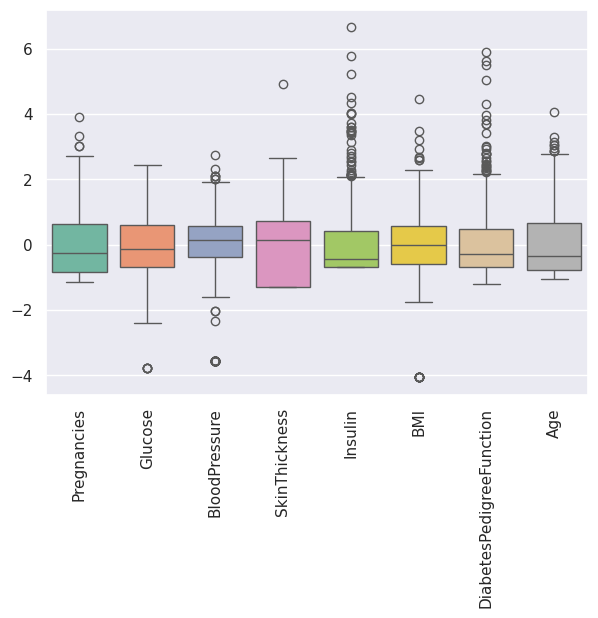

In [18]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

<ipython-input-19-2e86a68d17ec>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90);


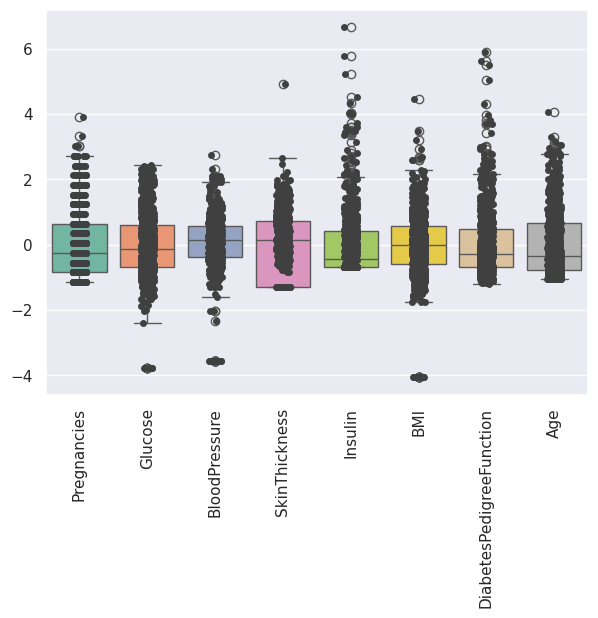

In [19]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

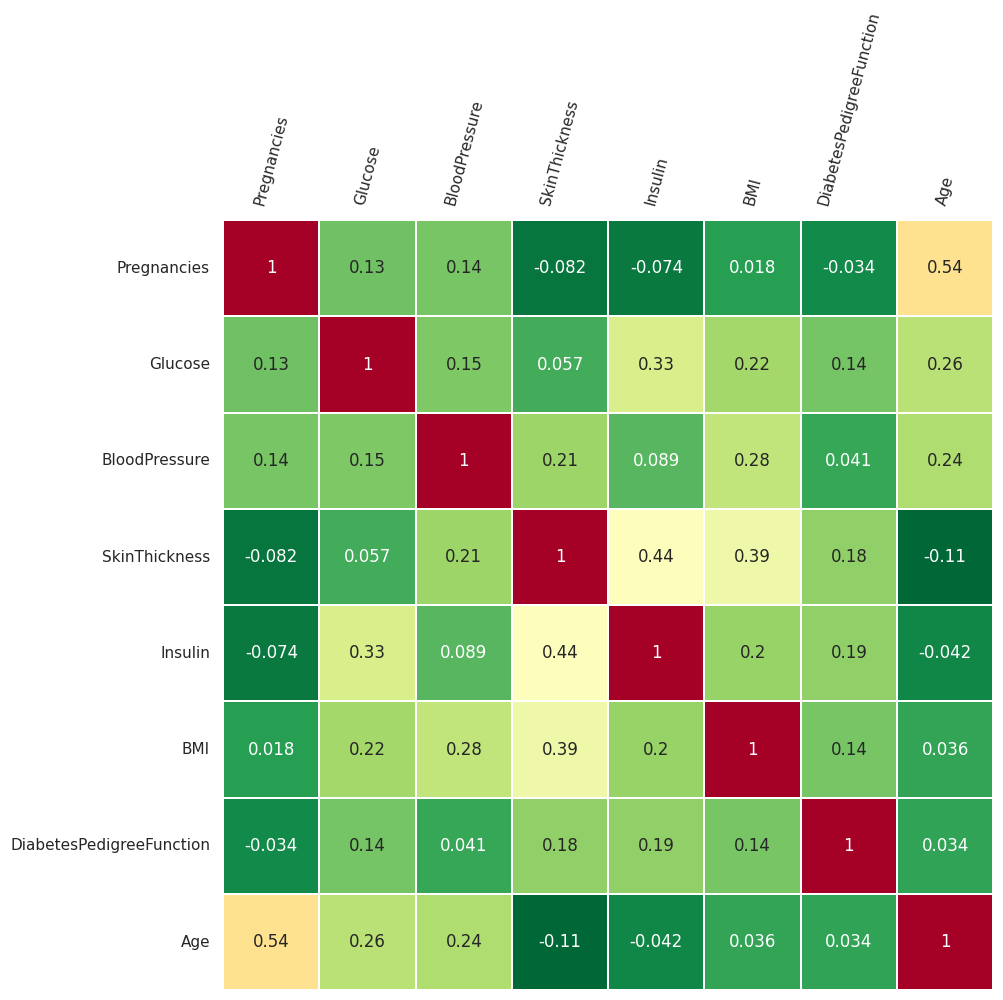

In [20]:
fig1,ax1 = plt.subplots(figsize=(15,10))
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.3, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=75);

Principal Component Analysis (PCA)

Text(0, 0.5, '$Z_2$')

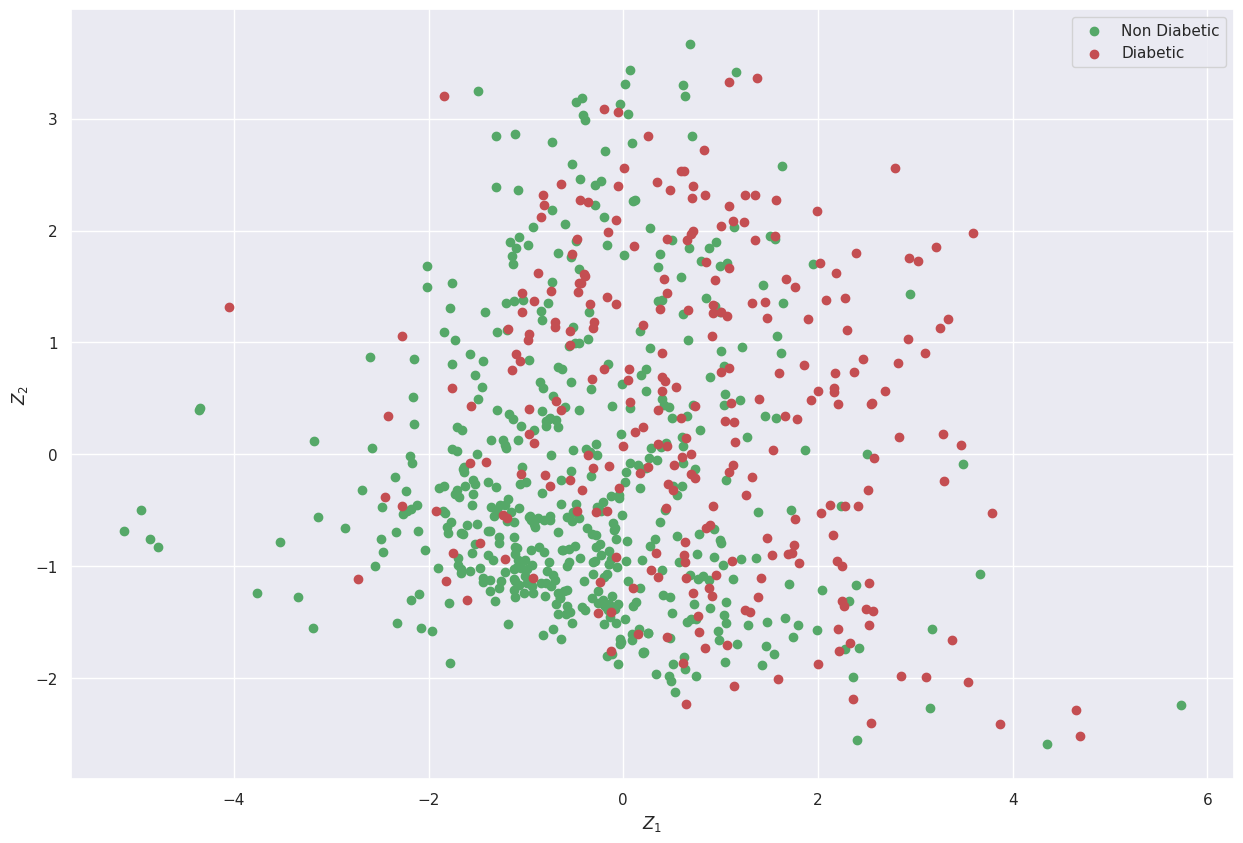

In [21]:
pca = PCA()
Z = pca.fit_transform(X)

idx_Non_Diabetic= np.where(y == 0)
idx_Diabetic = np.where(y == 1)


plt. figure(figsize=(15,10))
plt.scatter(Z[idx_Non_Diabetic,0], Z[idx_Non_Diabetic,1], c='g', label='Non Diabetic')
plt.scatter(Z[idx_Diabetic,0], Z[idx_Diabetic,1], c='r', label='Diabetic')


plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

Eigen Vectors

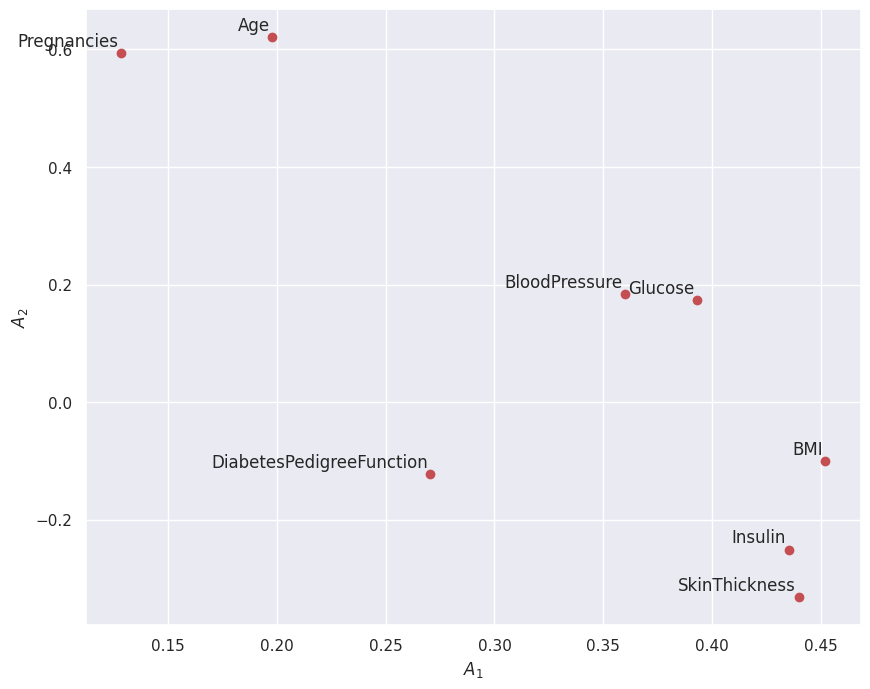

In [22]:
A = pca.components_.T
plt.figure(figsize=(10, 8))
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


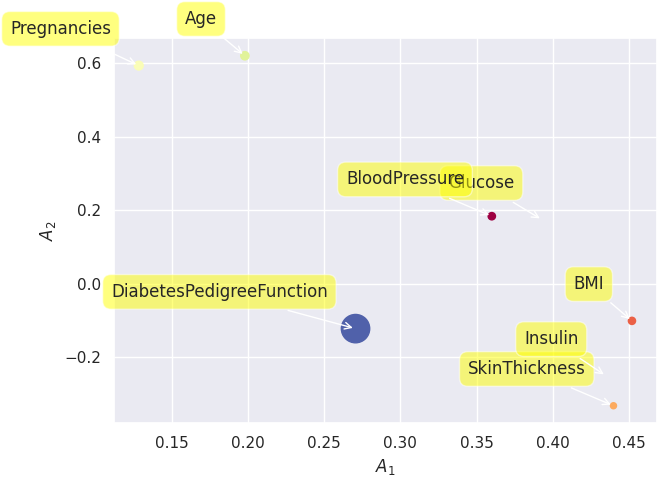

In [23]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

Scree Plot

array([2.09711056, 1.73346726, 1.03097228, 0.87667054, 0.76333832,
       0.68351839, 0.42036353, 0.40498938])

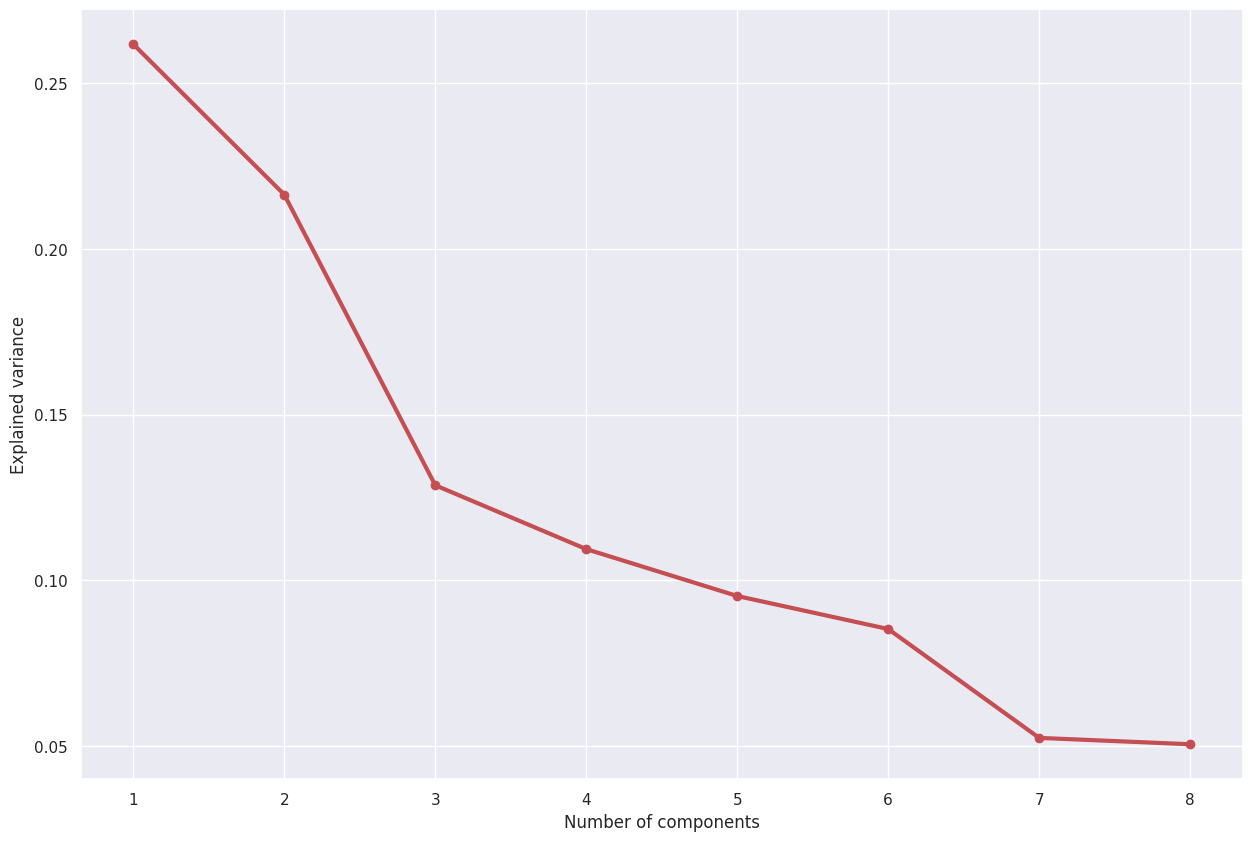

In [24]:
#Eigenvalues
Lambda = pca.explained_variance_

#Scree plot
x = np.arange(len(Lambda)) + 1
plt. figure(figsize=(15,10))
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
Lambda

Explained Variance

Text(0, 0.5, 'Cumulative explained variance')

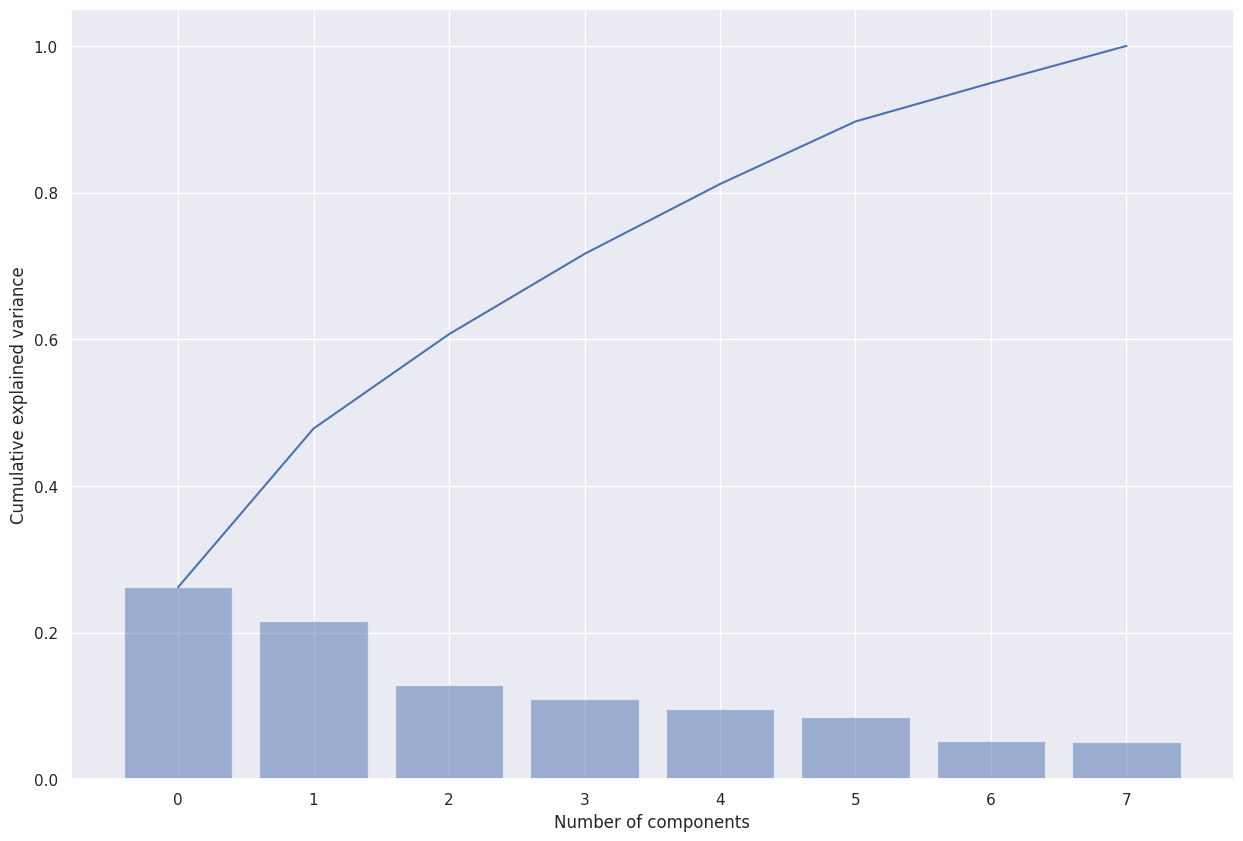

In [25]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt. figure(figsize=(15,10))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

array([ 1.23489499e+00, -7.33851670e-01,  1.59587594e+00, -1.27124099e+00,
       -2.18481921e+00,  8.35577116e-01, -1.10793965e+00,  8.55901880e-01,
       -2.42154631e-01,  3.20666064e+00,  6.47607201e-01,  1.92893021e+00,
        2.84892093e+00, -5.25323102e-01,  1.27621089e+00,  3.42493523e-01,
       -1.75473191e+00,  1.12123694e+00, -1.39264766e+00, -8.77617587e-01,
       -1.21440866e+00,  2.22863124e+00,  2.08281251e+00,  7.66243412e-01,
        2.17408978e+00,  1.44531562e+00,  1.86508824e+00, -1.16362532e+00,
        3.29815284e+00,  1.27552716e+00,  1.58922844e+00, -9.74579208e-01,
       -6.04866817e-01,  1.02453736e+00,  1.79421221e+00, -7.53028302e-01,
        2.11832390e+00,  1.29347684e+00, -1.19787066e+00, -2.92358442e-02,
       -2.81250376e-01,  1.37596920e+00,  1.90518470e+00,  1.98224820e+00,
        1.79807684e+00, -1.68362998e+00, -1.16650347e-01, -1.13391084e+00,
        2.02132477e-01,  3.97693610e-01, -7.41043284e-01, -8.83460815e-01,
        8.30354938e-02,  

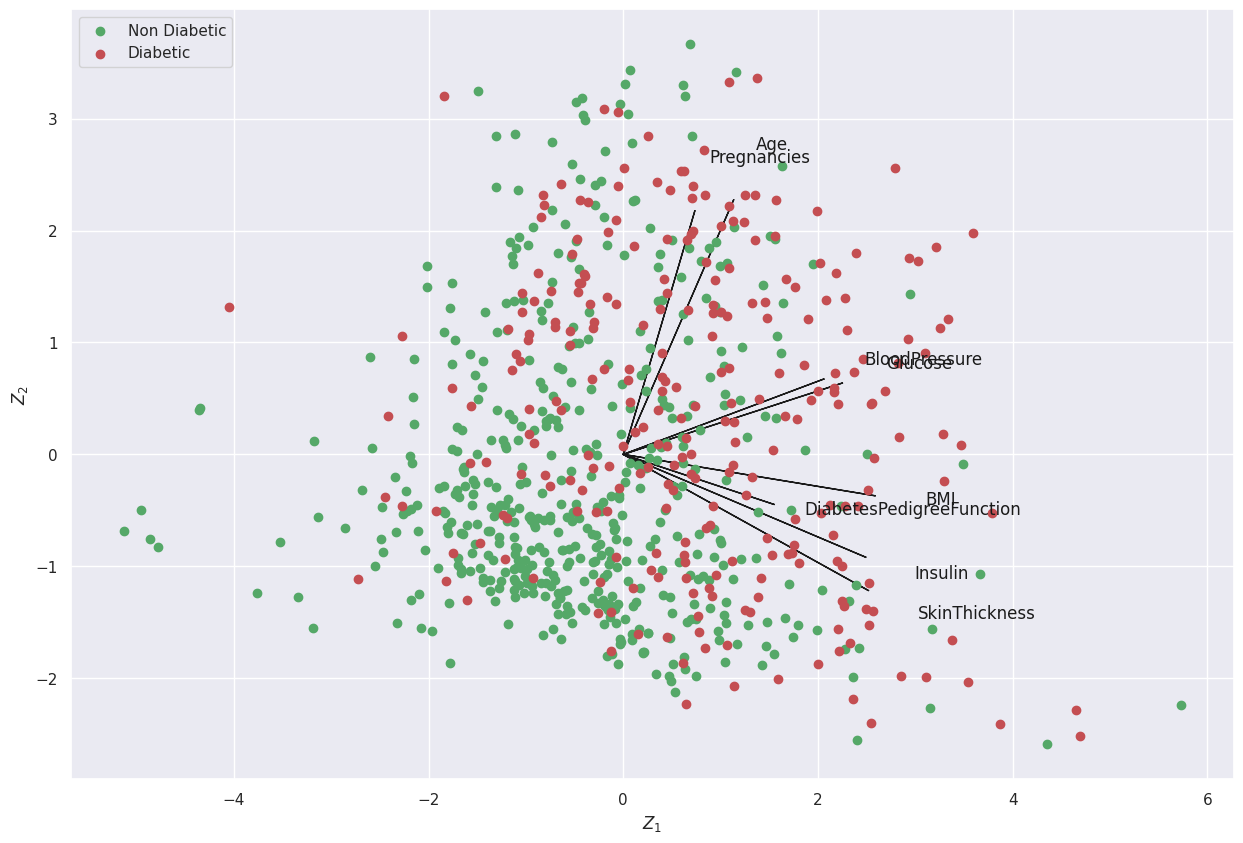

In [26]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt. figure(figsize=(15,10))
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Non_Diabetic,0], Z[idx_Non_Diabetic,1], c='g', label='Non Diabetic')
plt.scatter(Z[idx_Diabetic,0], Z[idx_Diabetic,1], c='r', label='Diabetic')

plt.legend(loc='upper left')
Z1
Z2

Using PCA Library

In [27]:
!pip install pca

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 2.8 MB/s eta 0:00:00


In [28]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [8] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [8] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [8] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[8]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


Principal Components

In [29]:
out['PC']

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    1.068503  1.234895  0.095930  0.496990 -0.109985  0.357183  0.858821   
1   -1.121683 -0.733852 -0.712938  0.285056 -0.389507 -0.406329  0.757034   
2   -0.396477  1.595876  1.760678 -0.070395  0.906474 -0.040018 -1.152990   
3   -1.115781 -1.271241 -0.663729 -0.579123 -0.356060 -0.412520 -0.029247   
4    2.359334 -2.184819  2.963107  4.033099  0.592684  1.078341  0.549358   
..        ...       ...       ...       ...       ...       ...       ...   
763  1.562085  1.923150 -0.867408 -0.390926 -2.541527 -0.077322  1.141357   
764 -0.100405 -0.614181 -0.764353 -0.134859  0.499290  0.529339  0.152109   
765 -0.283475  0.097065 -0.077192 -0.687561 -0.523009 -0.538270 -0.335563   
766 -1.060324  0.837062  0.425030 -0.204493  0.957593  0.153307  1.180308   
767 -0.839892 -1.151755 -1.009178  0.086929 -0.082651 -0.150096  0.245235   

          PC8  
0    0.974304  
1    0.354215  
2    1.068528  
3   -0.130648  
4   -0.319352  
..        ...  
763 -0.138590  
764  0.467532  
765  0.289439  
766 -0.534344  
767  0.515946  

[768 rows x 8 columns]

Scatter plot

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '8 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (26.1% expl.var)', ylabel='PC2 (21.6% expl.var)'>)

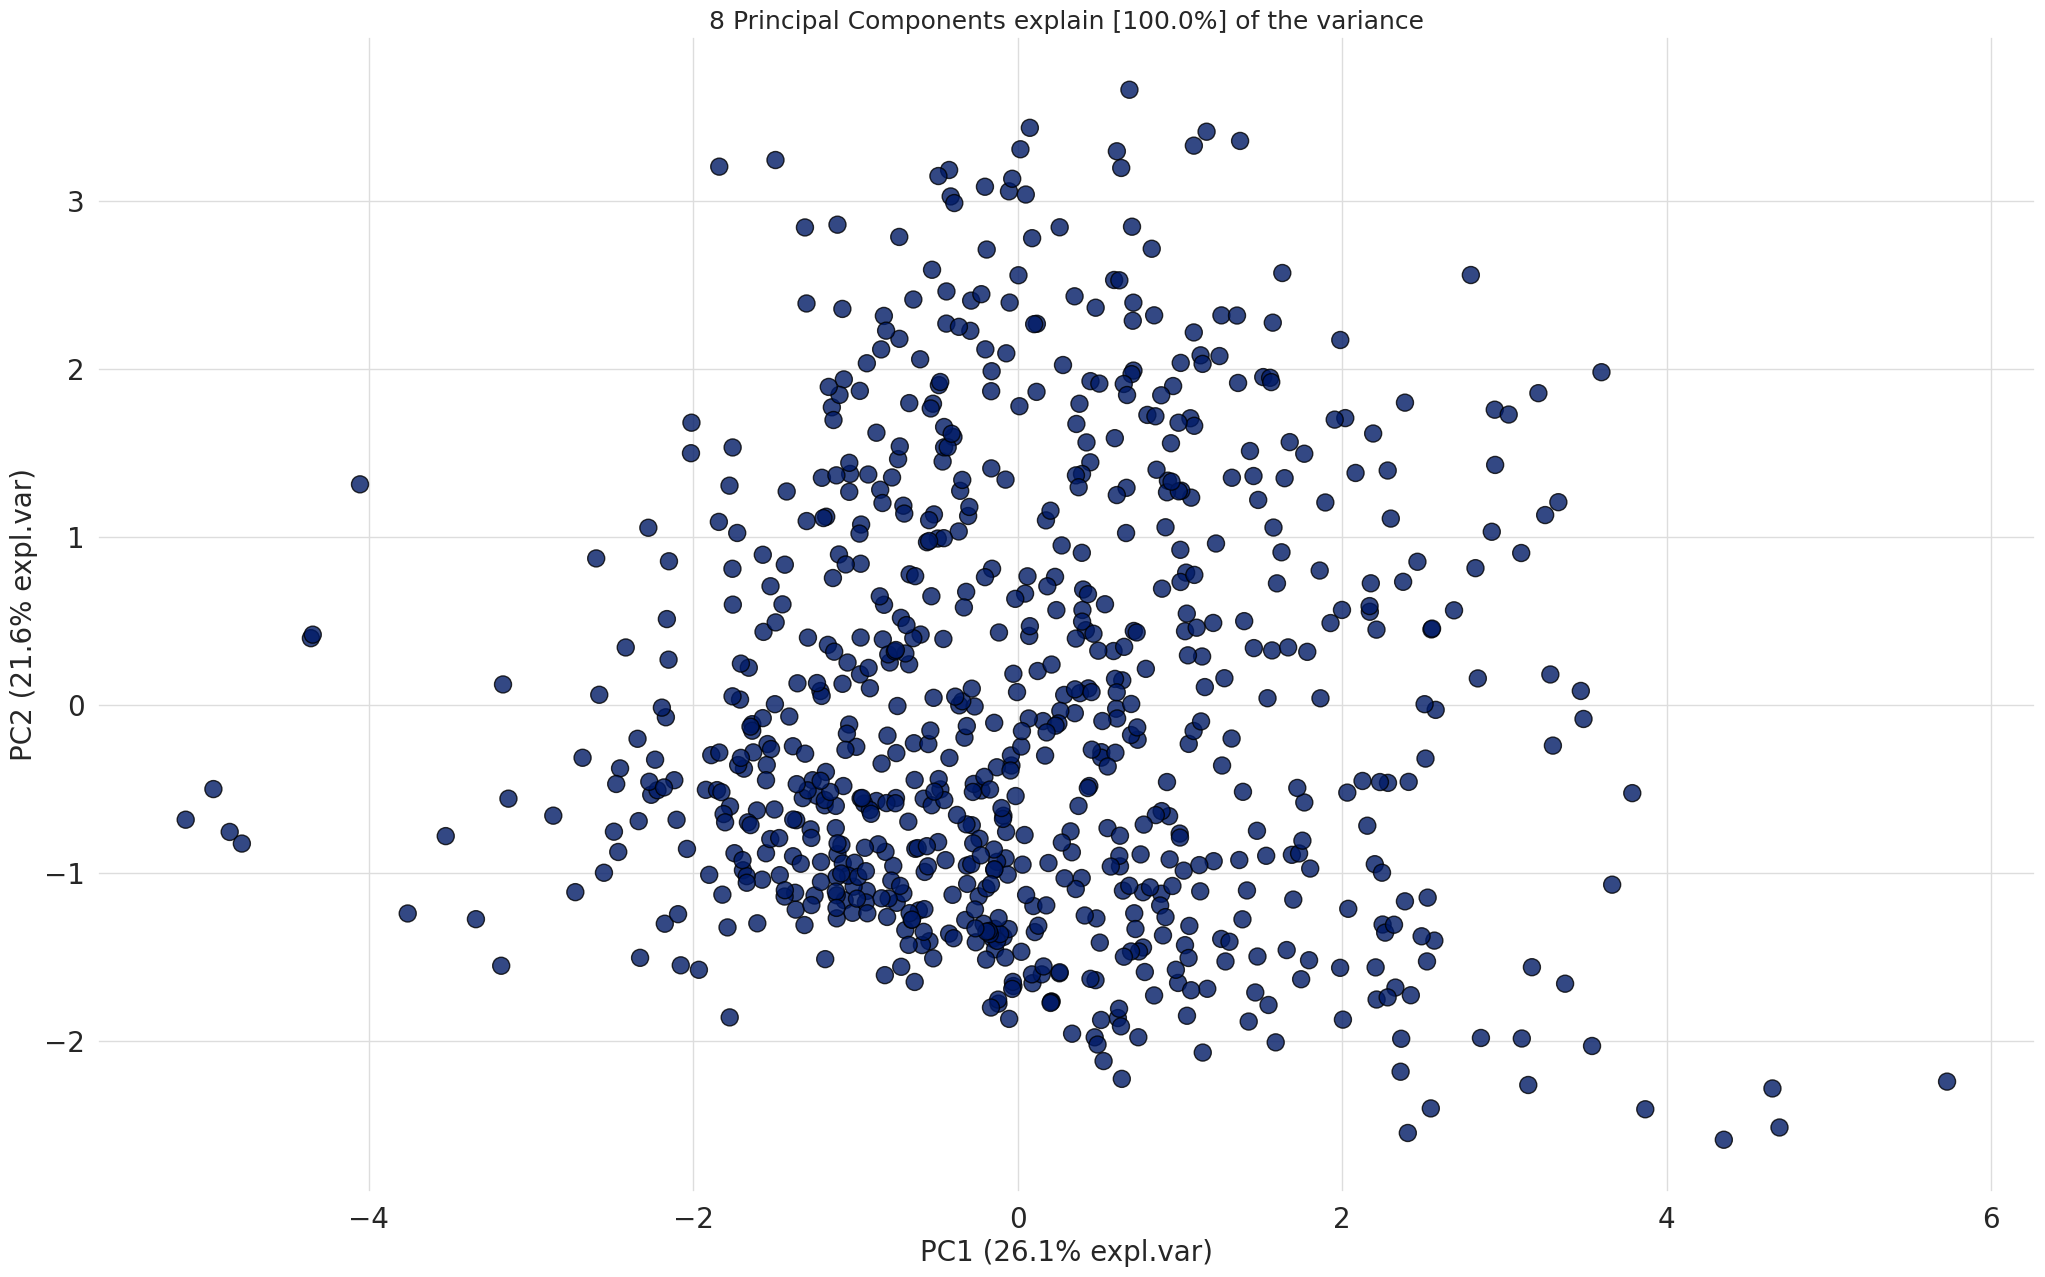

In [30]:
model.scatter(label=True, legend=False)

Eigenvectors

In [31]:
A = out['loadings'].T

Eigenvectors

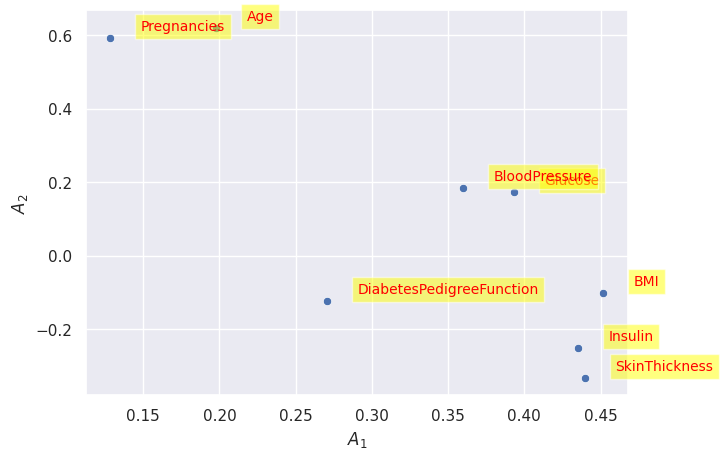

In [32]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

Scree Plot

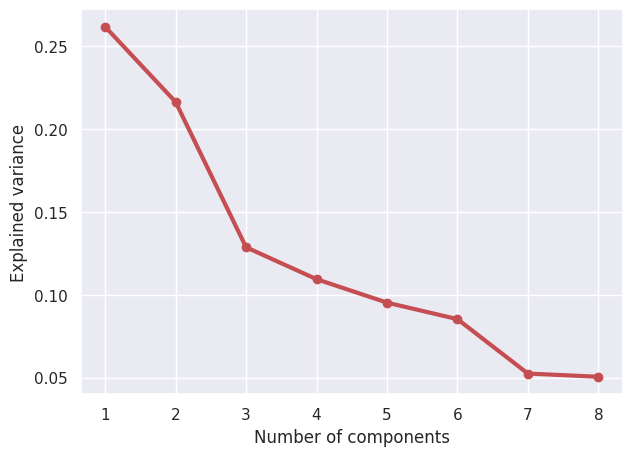

In [33]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

Explained Variance Plot

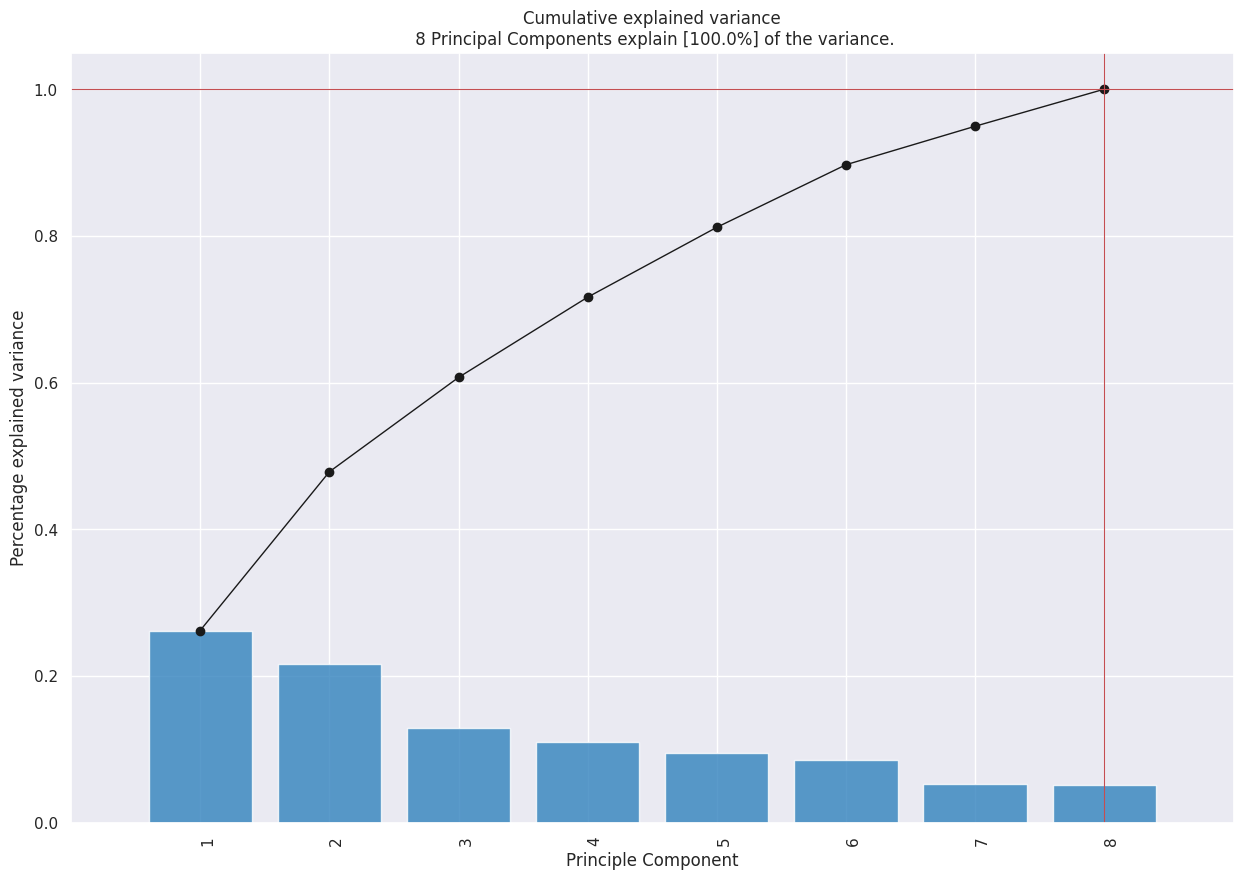

In [34]:
model.plot();

Biplot

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '8 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (26.1% expl.var)', ylabel='PC2 (21.6% expl.var)'>)

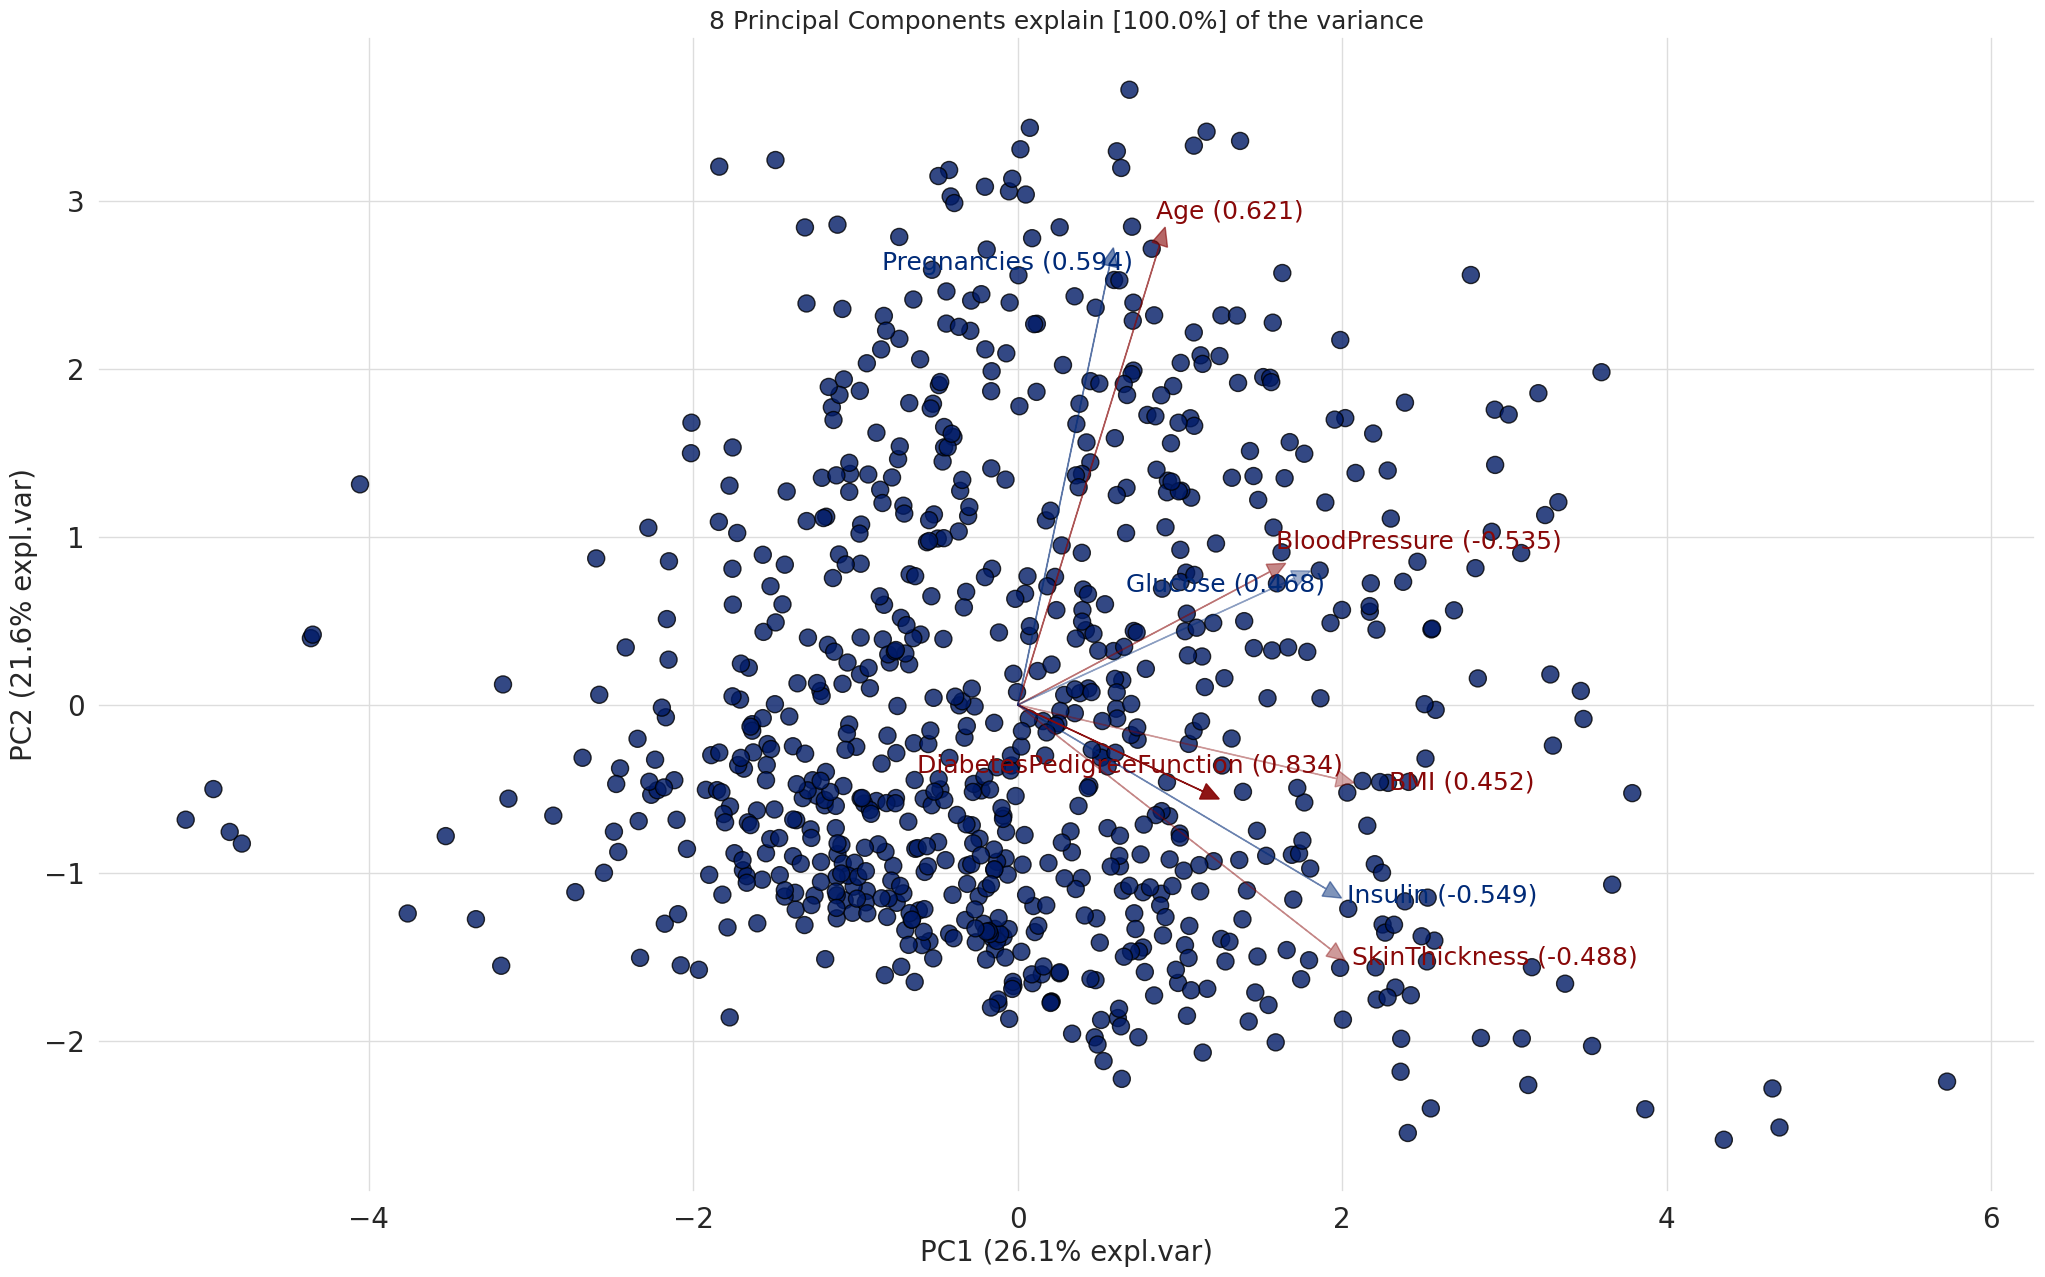

In [35]:
model.biplot(label=False, legend=False)

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


(<Figure size 3000x2500 with 1 Axes>,
 <Axes3D: title={'center': '8 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (26.1% expl.var)', ylabel='PC2 (21.6% expl.var)', zlabel='PC3 (12.8% expl.var)'>)

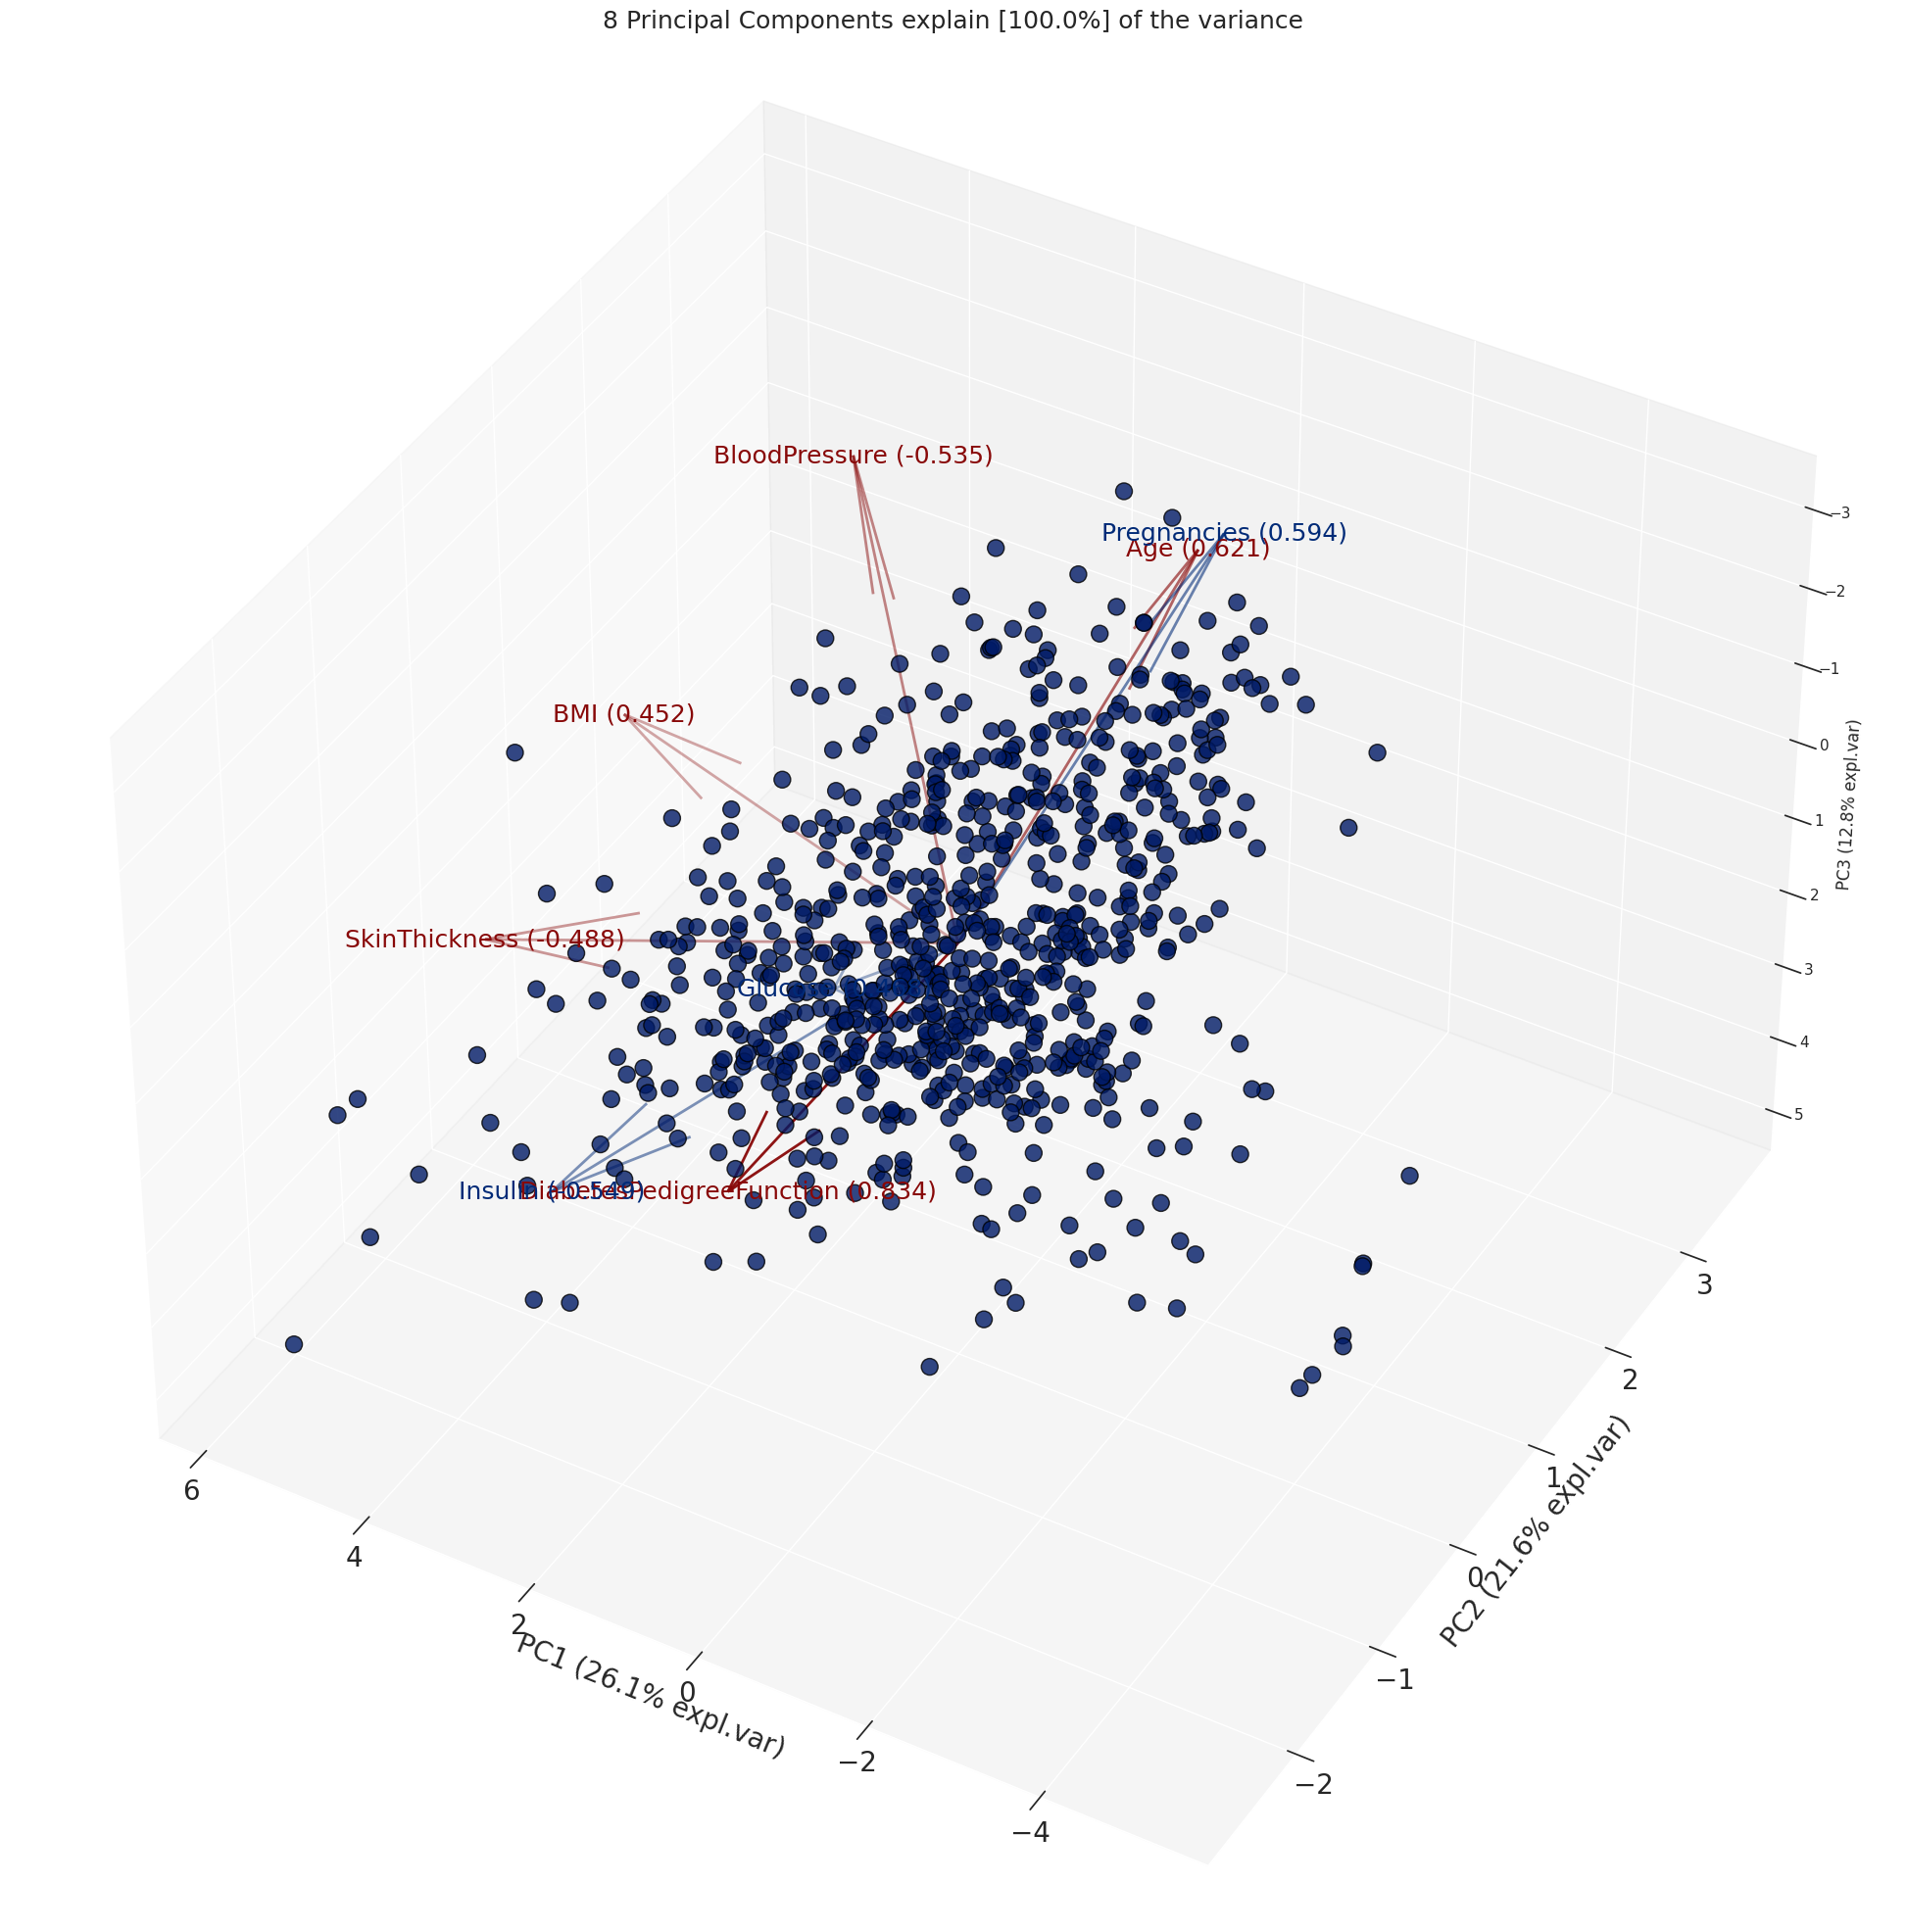

In [36]:
model.biplot3d(legend=False)

Classification using Pycaret
At first dataset is split into train and test set with 70% and 30% ratio respectively. Then using the PyCaret compare_models() function, the models which shows the highest accuracy on the original dataset can be found.

In [37]:
data = df.sample(frac=0.8, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (614, 9)
Unseen Data For Predictions: (154, 9)


Setting up the Environment in PyCaret

The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline (we will see them in later tutorials).

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In [38]:
from pycaret.classification import *
clf = setup(data=data, target='Outcome', train_size=0.7, session_id=123)

Comparing All Models

In [39]:
 #show the best model and their statistics
 best_model = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [40]:
best_model

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)

Create a Model

create_model is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. As the name suggests this function trains and evaluates a model using cross validation that can be set with fold parameter. The output prints a score grid that shows Accuracy, Recall, Precision, F1, Kappa and MCC by fold.

For the remaining part of this tutorial, we will work with the below models as our candidate models. The selections are for illustration purposes only and do not necessarily mean they are the top performing or ideal for this type of data.

Decision Tree Classifier ('dt')
K Neighbors Classifier ('knn')
Logistic Regression ('lr')
There are many classifiers available in the model library of PyCaret. Please view the create_model() docstring for the list of all available models.

Create Decision Tree Classifier

In [41]:
dt = create_model('dt')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Tune the model

In [42]:
tuned_dt = tune_model(dt)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [43]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Create LDA Model

In [44]:
lda = create_model('lda')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [45]:
tuned_lda = tune_model(lda)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [46]:
evaluate_model(tuned_lda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Classification + PCA

In [47]:
setup(data=data, target='Outcome', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)


In [48]:
#show the best model and their statistics
best_model_pca = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [53]:
lda = create_model('lda')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [54]:
tuned_lda = tune_model(lda)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [55]:
evaluate_model(tuned_lda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [56]:
lr = create_model('lr')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [57]:
tuned_lr = tune_model(lr)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [59]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [49]:
best_model_pca

GaussianNB(priors=None, var_smoothing=1e-09)

## Tune the Best Model

In [50]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [51]:
tuned_best_model_pca

GaussianNB(priors=None, var_smoothing=0.007)

Evaluate the Best Model

In [60]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…